# Uber Data Analysis For NEW YORK

A dispatch base is the company for whom the driver drives for and that company conncets the drivers to passengers. Uber does this


 B02617 – Weiter LLC
 B02598 – Hinter LLC 
 B02682 – Schemecken LLC 
 B02764 – Danach-NY LLC 
 B02512 – Unter LLC 
 B02765 – Grun LLC
 
 
We also have other taxi apps data that we can compare with uber and aggregate FHV data


Freedom of Information law got thw data of 6 for-hire vehicle bases affilated with Uber

In [4]:
#data with 45lakh 34thousand values
import pandas as pd
import os
#imported os so as to read all the files by concatinating

# this is for heatmap
import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
#we imported date time library to separate minutes

In [5]:
df= pd.read_csv("D:/CV/Projects present in CV/uber data analysis/uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-sep14.csv")
#read 1 file by this method

files = [file for file in os.listdir("D:/CV/Projects present in CV/uber data analysis/uber-tlc-foil-response-master/uber-trip-data")]
#to read all the  files present in that folder


all_months_data = pd.DataFrame()
for file in files:
    df= pd.read_csv("D:/CV\Projects present in CV/uber data analysis/uber-tlc-foil-response-master/uber-trip-data/"+ file)
    all_months_data = pd.concat([all_months_data, df], sort = False)
#in this we concatinated all the files and made 1 single file of months April to September 2014
all_months_data.to_csv("all_data2.csv", index=False)

In [6]:
Data=all_months_data
all_months_data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


# The data has been succesfully added

#now we will separate date and time and more specifically months and time 

In [7]:
all_months_data["Month"]= all_months_data["Date/Time"].str[0:1]
#this will take the column Date/Time and make a new column "Month" by takig 
#the srting 0:1 here 1 is excluded so only 0th valye is taken


#This could have also been done by datetime  = all_months_data["Date/Time"].dt.month
all_months_data

,Date/Time,Lat,Lon,Base,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9


In [8]:
#to separeate time values


#this could have been done by using Datetime

all_months_data["Time(hours)"]=all_months_data["Date/Time"].str[10:12]
all_months_data
#this is not giving correct data so we will have to use date time library

,Date/Time,Lat,Lon,Base,Month,Time(hours)
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,4,:1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,4,:1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,4,:2
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,4,:2
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,4,:3
...,...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9,22
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9,22
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9,22
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9,22


In [9]:
#we converted the date and time to date time format the other way to to this is by making a function which is very slow way
#best way
all_months_data["Date/Time"]=pd.to_datetime(all_months_data["Date/Time"])



#now we are extracting the hours and minutes from time
all_months_data["Time(hours)"]=all_months_data["Date/Time"].dt.hour
all_months_data["Time(minutes)"]=all_months_data["Date/Time"].dt.minute


#to extract the weekday we did this here 0 is MONDAY and 6 is Sunday
all_months_data["Weekday"]=all_months_data["Date/Time"].dt.weekday
all_months_data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,1
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,1


In [10]:

#The weekdays we got earlier were in numbers. Using this method we got weekdays as names we created a dictionary

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_months_data['Weekday'] = all_months_data['Date/Time'].dt.dayofweek.map(dayOfWeek)
all_months_data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,Tuesday
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,Tuesday
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,Tuesday
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,Tuesday
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,Tuesday


In [11]:



#to see if ther are any na values here
#na_df=all_months_data[all_months_data.isna().any(axis=1)]
#we observe no na values is present so we have a clean data
#na_df


#for histogram if we do bins = 30 the number of bars will increase to 30, RWIDTH can be changed range=, 




# Analysis



In [12]:
import matplotlib.pyplot as plt

# Question- Month wise distribution of number of rides

In [13]:
#first we will group by months to see which month the number of rides are more
Data_for_months= all_months_data.groupby("Month").count()
Data_for_months=Data_for_months.iloc[:,0:1]
#we extraced 2 column out of the data
Data_for_months

,Date/Time
Month,
4,564516
5,652435
6,663844
7,796121
8,829275
9,1028136


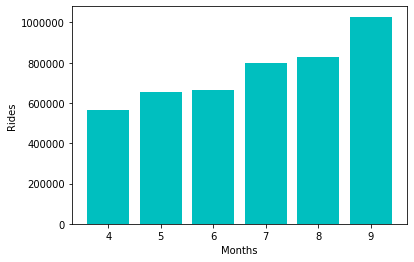

In [14]:
months= [month for month, df in all_months_data.groupby('Month')]


plt.bar(months, Data_for_months["Date/Time"], color='c')
plt.xlabel("Months")
plt.ylabel("Rides")
plt.show()


# Question - Hourly Distribution of Rides

In [15]:
#groupby is similar to powerpivots
Data_for_hour= all_months_data.groupby("Time(hours)").count()
Data_for_hour=Data_for_hour.iloc[:,0:1]
#we extraced 2 column out of the data using iloc
Data_for_hour

,Date/Time
Time(hours),
0,103836
1,67227
2,45865
3,48287
4,55230
5,83939
6,143213
7,193094
8,190504


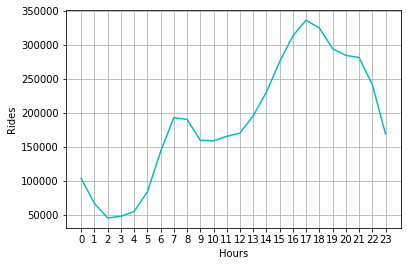

In [16]:
hours= [hour for hour, df in all_months_data.groupby('Time(hours)')]

#we will plot the hours 
plt.plot(hours, Data_for_hour["Date/Time"], color='c')
plt.xlabel("Hours")
plt.xticks(hours)
plt.ylabel("Rides")
plt.grid()
plt.show()


Clearly we can observe that people book uber while going to office or while coming back but more number of cars are booked in evening which is a mistery

# Question weekday and day wise distribution

In [17]:

all_months_data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,Tuesday
...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,Tuesday
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,Tuesday
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,Tuesday
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,Tuesday


In [18]:



k = all_months_data.groupby("Weekday").count()
p=k.iloc[:,0:1]
p

,Date/Time
Weekday,
Friday,741139
Monday,541472
Saturday,646114
Sunday,490180
Thursday,755145
Tuesday,663789
Wednesday,696488


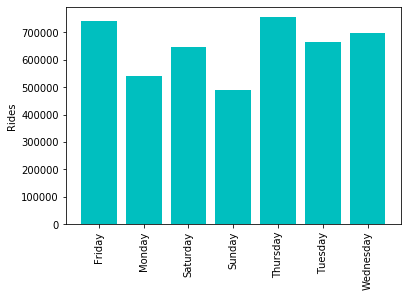

In [19]:
weekdays= [weekday for weekday, df in all_months_data.groupby('Weekday')]
#keys are named

plt.bar(weekdays, p["Date/Time"], color='c')
plt.ylabel('Rides')
plt.xticks(weekdays, rotation='vertical', )
plt.show()


In [20]:
#extracted the days from the data
all_months_data["Date(day)"] = all_months_data['Date/Time'].dt.day
all_months_data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day)
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,Tuesday,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,Tuesday,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,Tuesday,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,Tuesday,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,Tuesday,1
...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,Tuesday,30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,Tuesday,30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,Tuesday,30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,Tuesday,30


In [21]:
#we need to convert day to int
all_months_data["Date(day)"]= pd.to_numeric(all_months_data["Date(day)"])

In [22]:
m = all_months_data.groupby("Date(day)").count()
n=m.iloc[:,0:1]
k=n.drop([31])

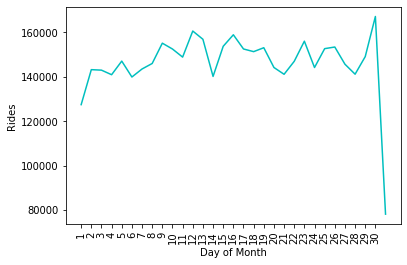

In [23]:
hours = [hour for hour, df in all_months_data.groupby('Date(day)')]

plt.plot(hours, n["Date/Time"], color='c')
plt.xlabel("Day of Month")
plt.xticks( range(1,31), hours, rotation = 'vertical')
plt.ylabel("Rides")
plt.show()


# ............. The Other Way Of Analyzing Efficient Way

In [24]:
Data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day)
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,Tuesday,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,Tuesday,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,Tuesday,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,Tuesday,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,Tuesday,1
...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,Tuesday,30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,Tuesday,30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,Tuesday,30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,Tuesday,30


In [25]:
#datetime is an awesome library as after converting a column to datetime format and then we can extract 
#weekday, weekday name, month, hour, minutes,day,year everything just by putting .dt.day after it 
#although it takess very long to complete this as function will go to each row and do its work

#.map is a tool that applys a function to all the rows to it      
#This is the worst method ever     


#Data["Date/Time"]=Data["Date/Time"].map(pd.to_datetime)
#never ever ever use this


Data["Date/Time"]=pd.to_datetime(Data["Date/Time"])

In [26]:
#we will create new column by making functions
def get_dom(dt):
    return dt.day
#now we will use the map tool to put this function on dataframe
Data["Day"]= Data["Date/Time"].map(get_dom)

In [27]:
#we will use the same methd of making a new column we will first 
def get_hour(dt):
    return dt.hour
Data["Hour"]= Data["Date/Time"].map(get_hour)

In [28]:
def get_weekday(dt):
    return dt.weekday()
Data["Weekday"]=Data["Date/Time"].map(get_weekday)
Data

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day),Day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,0,11,1,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,0,17,1,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,0,21,1,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,0,28,1,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,0,33,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,9,22,57,1,30,30,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,9,22,57,1,30,30,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,9,22,58,1,30,30,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,9,22,58,1,30,30,22


# #Analysis and Visualization

In [29]:
#to produce a histogram
m = Data.groupby("Day").count()
m

,Date/Time,Lat,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day),Hour
Day,,,,,,,,,,
1,127430,127430,127430,127430,127430,127430,127430,127430,127430,127430
2,143201,143201,143201,143201,143201,143201,143201,143201,143201,143201
3,142983,142983,142983,142983,142983,142983,142983,142983,142983,142983
4,140923,140923,140923,140923,140923,140923,140923,140923,140923,140923
5,147054,147054,147054,147054,147054,147054,147054,147054,147054,147054
6,139886,139886,139886,139886,139886,139886,139886,139886,139886,139886
7,143503,143503,143503,143503,143503,143503,143503,143503,143503,143503
8,145984,145984,145984,145984,145984,145984,145984,145984,145984,145984
9,155135,155135,155135,155135,155135,155135,155135,155135,155135,155135


In [30]:
#change columns
col_name="Lat"
first_col = m.pop(col_name)
m.insert(0, col_name, first_col)
m=m.drop([31])
m

,Lat,Date/Time,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day),Hour
Day,,,,,,,,,,
1,127430,127430,127430,127430,127430,127430,127430,127430,127430,127430
2,143201,143201,143201,143201,143201,143201,143201,143201,143201,143201
3,142983,142983,142983,142983,142983,142983,142983,142983,142983,142983
4,140923,140923,140923,140923,140923,140923,140923,140923,140923,140923
5,147054,147054,147054,147054,147054,147054,147054,147054,147054,147054
6,139886,139886,139886,139886,139886,139886,139886,139886,139886,139886
7,143503,143503,143503,143503,143503,143503,143503,143503,143503,143503
8,145984,145984,145984,145984,145984,145984,145984,145984,145984,145984
9,155135,155135,155135,155135,155135,155135,155135,155135,155135,155135


Text(0.5, 1.0, 'Frequency of Ride on a Day')

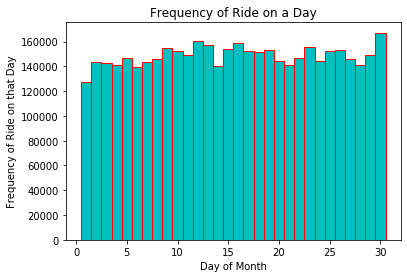

In [31]:
#hist is applicable only after importing numpy  



#best representation

plt.hist(Data.Day, bins=30, range=(.5,30.5), edgecolor='red',color='c',linewidth=1, rwidth=1.6)
plt.xlabel("Day of Month")

plt.ylabel("Frequency of Ride on that Day")
plt.title("Frequency of Ride on a Day")

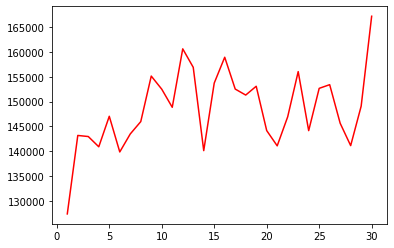

In [32]:
k=m.iloc[:,0:1]
plt.plot(k, color="r")

In [33]:
m

,Lat,Date/Time,Lon,Base,Month,Time(hours),Time(minutes),Weekday,Date(day),Hour
Day,,,,,,,,,,
1,127430,127430,127430,127430,127430,127430,127430,127430,127430,127430
2,143201,143201,143201,143201,143201,143201,143201,143201,143201,143201
3,142983,142983,142983,142983,142983,142983,142983,142983,142983,142983
4,140923,140923,140923,140923,140923,140923,140923,140923,140923,140923
5,147054,147054,147054,147054,147054,147054,147054,147054,147054,147054
6,139886,139886,139886,139886,139886,139886,139886,139886,139886,139886
7,143503,143503,143503,143503,143503,143503,143503,143503,143503,143503
8,145984,145984,145984,145984,145984,145984,145984,145984,145984,145984
9,155135,155135,155135,155135,155135,155135,155135,155135,155135,155135


# Sorting cant be done with this method so
New Method

In [34]:
#this is similar to groupby method

#for a, rows in Data.groupby("Day"):
#print(a, len(rows))
 

#map  is similar to APPLY allows us to ACTIVATE A FUNCTION

def count_rows(rows):
    return len(rows)
by_date= Data.groupby("Day").apply(count_rows)
by_date

Day
1     127430
2     143201
3     142983
4     140923
5     147054
6     139886
7     143503
8     145984
9     155135
10    152500
11    148860
12    160606
13    156892
14    140148
15    153726
16    158921
17    152524
18    151319
19    153088
20    144179
21    141112
22    146952
23    156032
24    144169
25    152667
26    153405
27    145652
28    141157
29    149086
30    167160
31     78073
dtype: int64

<BarContainer object of 31 artists>

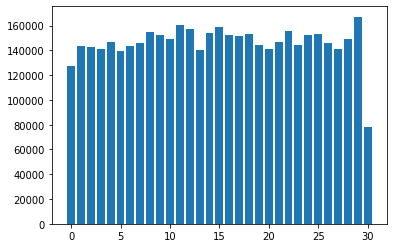

In [35]:
plt.bar(range(31), by_date)

In [36]:
by_date_s=by_date.sort_values()
by_date_s

Day
31     78073
1     127430
6     139886
14    140148
4     140923
21    141112
28    141157
3     142983
2     143201
7     143503
24    144169
20    144179
27    145652
8     145984
22    146952
5     147054
11    148860
29    149086
18    151319
10    152500
17    152524
25    152667
19    153088
26    153405
15    153726
9     155135
23    156032
13    156892
16    158921
12    160606
30    167160
dtype: int64

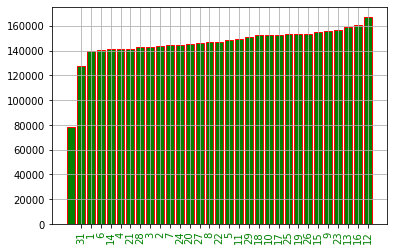

In [37]:
plt.bar(range(31), by_date_s ,color='g',edgecolor='red')
plt.xticks(range(1,31), by_date_s.index, rotation='vertical',color='g')
plt.grid()
plt.show()

# CROSS ANALYSIS

# VVIMP

In [38]:
#grouping them with 2 filters
d=Data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

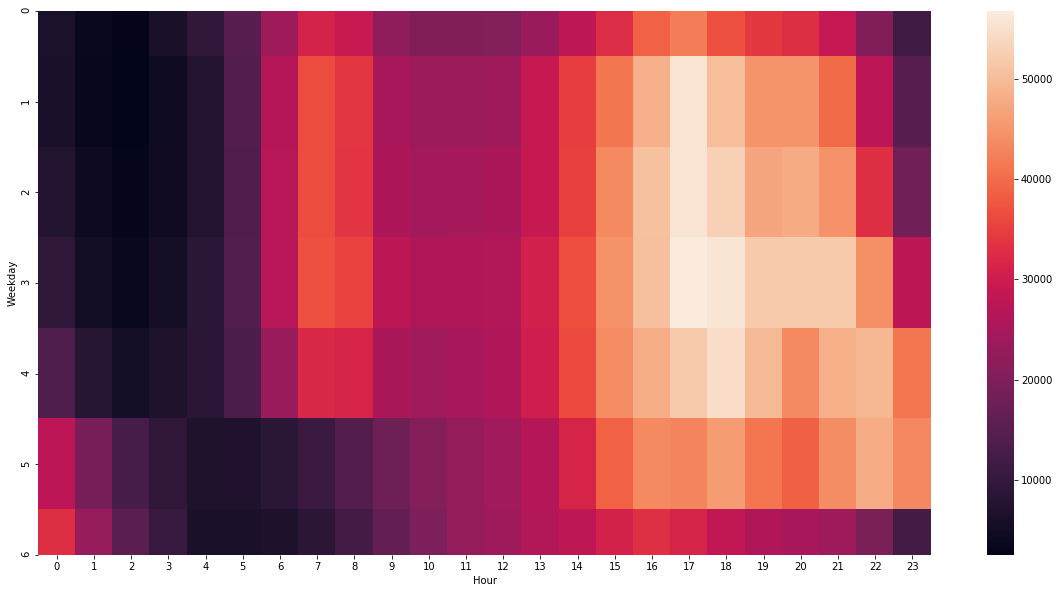

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(d)

In [40]:
#we can observe that on friday and saturday more people book uber between 10pm  and 12 am
#VEry few people book uber on Sunday MOnday Tuesday Wednesday between 11pm and 5 am

''

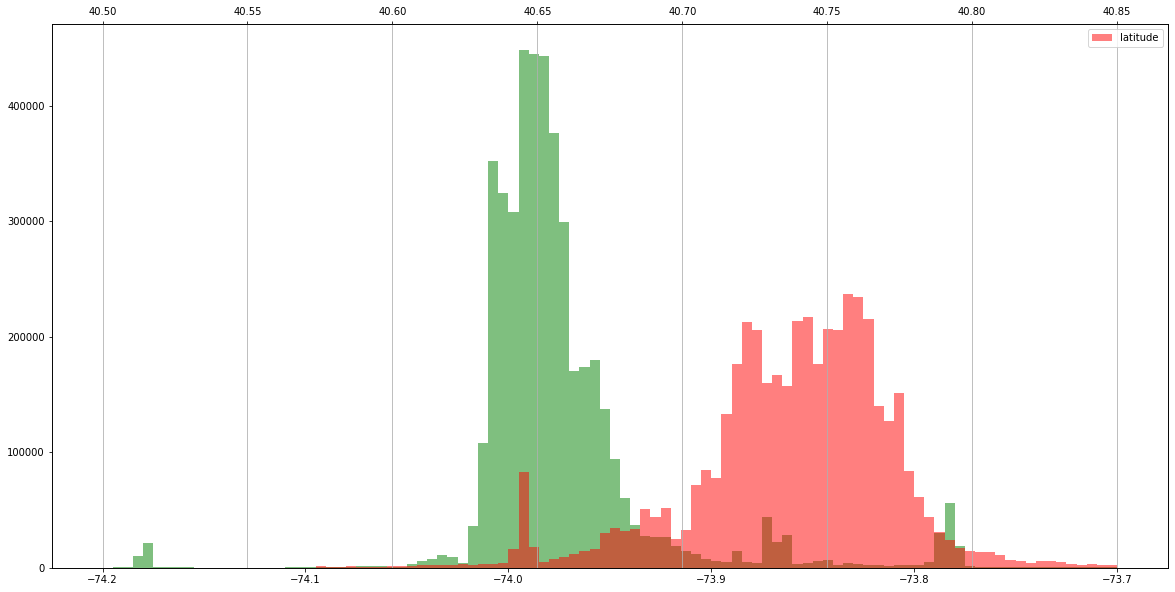

In [41]:
plt.figure(figsize=(20, 10))
plt.hist(Data['Lon'], bins=100, range=(-74.2,-73.7),color = 'g', alpha=0.5,label = 'longitude')
plt.twiny()
plt.hist(Data['Lat'], bins=100, range=(40.5,40.85), color = 'r', alpha=0.5, label = 'latitude')
plt.legend(loc='best')
plt.grid()
;

(40.7, 41)

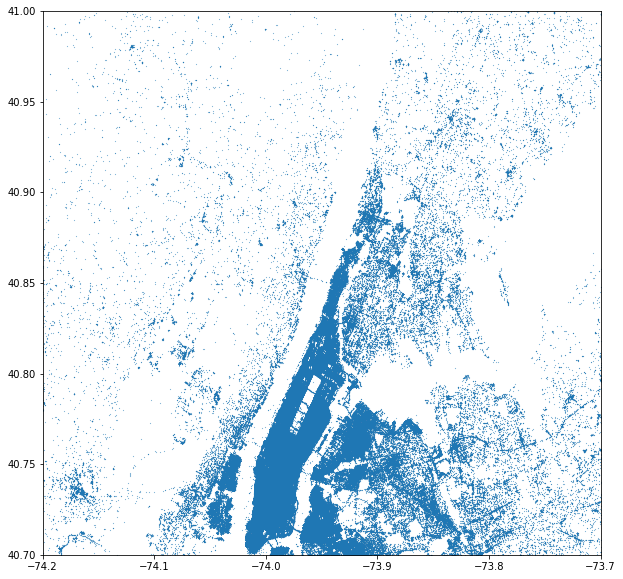

In [42]:
#the first line is for figure size
#2nd line is for grah characterstics
#ms is for the size of the * we are using as scatter points 
#as ms decrease size of point decrease and as ms increase size of point increase
#aplha is for transparency    as alpha = 1 it is not transparent as alpha =0.25 transparency =0.25
plt.figure(figsize=(10, 10))
plt.plot(Data['Lon'], Data['Lat'], '*', ms=0.6, alpha=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

# END

# ////////////////

In [43]:
by_date

Day
1     127430
2     143201
3     142983
4     140923
5     147054
6     139886
7     143503
8     145984
9     155135
10    152500
11    148860
12    160606
13    156892
14    140148
15    153726
16    158921
17    152524
18    151319
19    153088
20    144179
21    141112
22    146952
23    156032
24    144169
25    152667
26    153405
27    145652
28    141157
29    149086
30    167160
31     78073
dtype: int64